<a href="https://colab.research.google.com/github/towcorp/CursoPython/blob/master/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise Exploratória

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [38]:
# Upload de arquivos
from google.colab import files
arq = files.upload()

Saving Vendas.xlsx to Vendas (1).xlsx


In [3]:
# Criando o DataFrame
df = pd.read_excel('Vendas.xlsx')

In [37]:
# Visualizar primeiras linas
df.head()

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda,Comissao
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00,67.90
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00,83.20
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00,79.00
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32,76.53
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89,45.99


In [9]:
# quantidade de linhas e colunas
df.shape

(457, 12)

In [6]:
# tipos de dados nas colunas
df.dtypes

ID-Produto             object
Produto                object
Categoria              object
Segmento               object
Fabricante             object
Loja                   object
Cidade                 object
Estado                 object
Vendedor               object
ID-Vendedor             int64
Data Venda     datetime64[ns]
ValorVenda            float64
dtype: object

In [7]:
# Qual a receita total?
df['ValorVenda'].sum()

361081.11

In [132]:
# Quanto cada vendedor receberá de comissao sendo 8%?
df['Comissao'] = df['ValorVenda'].mul(0.08)
df['Comissao'] = round(df['Comissao'], 2)
df

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda,Comissao
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00,54.32
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00,66.56
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00,63.20
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32,61.23
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89,36.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-09-23,1234.00,98.72
453,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-10-24,1234.00,98.72
454,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola,R1295,Rio de Janeiro,Rio de Janeiro,Aline Sutter,1008,2015-11-25,1230.00,98.40
455,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-11-26,1234.00,98.72


In [80]:
# Qual os produtos mais vendidos por ano?
df.groupby([df['Data Venda'].dt.year, 'Produto'])["ValorVenda"].sum()

Data Venda  Produto                 
2012        Desktop HP 16 GB             2134.12
            Forno-Micro-Ondas            1345.00
            Geladeira Duplex            12070.89
            Grill                         234.00
            LG K10 TV Power               679.00
            Lavadora 11 Kg               2606.19
            Micro-Ondas                  5611.00
            Notebook Dell 8 GB          12823.54
2013        Ar Condicionado              6456.00
            Aspirador                    2655.00
            Desktop HP 16 GB            12431.99
            Forno-Micro-Ondas            3037.89
            Fritadeira                    297.00
            Geladeira Duplex            29765.56
            Grill                         477.00
            Impressora Deskjet           7077.44
            Lavadora 11 Kg              10503.57
            Micro-Ondas                  2145.00
            Samsung Galaxy 8             9897.00
            Secadora Vapor      

In [95]:
#Qual total de produdos vendidos?
df['Produto'].value_counts(ascending=False)

Geladeira Duplex            110
Aspirador                    61
Micro-Ondas                  56
Impressora Deskjet           36
Morotola Moto G5             29
Ventilador                   22
Fritadeira                   20
Samsung Galaxy 8             16
Lavadora 11 Kg               16
Desktop HP 16 GB             14
Processador de Alimentos     13
Secadora Vapor               12
Ar Condicionado              12
Forno-Micro-Ondas            11
Notebook Dell 8 GB           10
Grill                         9
Liquidificador                8
Sony Experia XA               1
LG K10 TV Power               1
Name: Produto, dtype: int64

In [96]:
df.groupby("Produto")['ValorVenda'].sum().sort_values(ascending=False)

Produto
Geladeira Duplex            121824.32
Samsung Galaxy 8             61884.00
Morotola Moto G5             35670.00
Micro-Ondas                  28748.13
Impressora Deskjet           20939.90
Ar Condicionado              14606.00
Desktop HP 16 GB             14566.11
Lavadora 11 Kg               13109.76
Notebook Dell 8 GB           12823.54
Aspirador                    10373.45
Secadora Vapor                7976.11
Forno-Micro-Ondas             6600.79
Ventilador                    2934.00
Fritadeira                    2675.00
Processador de Alimentos      1937.00
Grill                         1899.00
Liquidificador                1136.00
Sony Experia XA                699.00
LG K10 TV Power                679.00
Name: ValorVenda, dtype: float64

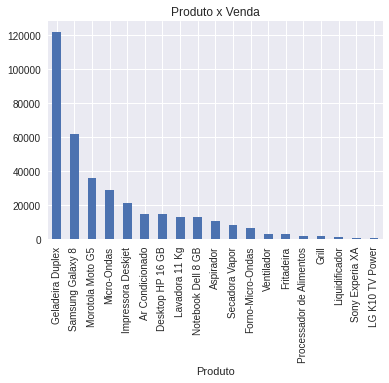

In [98]:
# Grafico de produtos vendidos
df.groupby("Produto")['ValorVenda'].sum().sort_values(ascending=False).plot.bar(title='Produto x Venda');

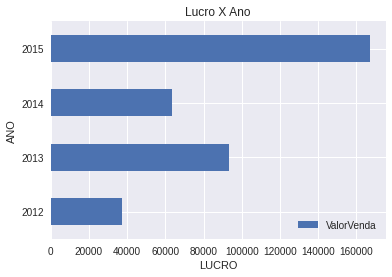

In [105]:
# Receita por ano
df.groupby(df['Data Venda'].dt.year)['ValorVenda'].sum().plot.barh(title='Lucro X Ano')
plt.xlabel('LUCRO')
plt.ylabel("ANO")


In [107]:
df_2013 = df[df['Data Venda'].dt.year == 2013]

Text(0, 0.5, 'Lucro')

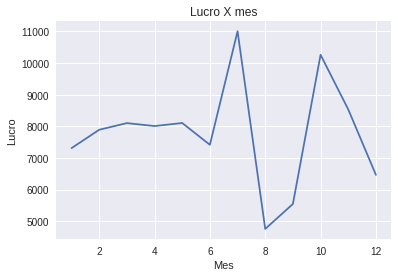

In [114]:
# Receita de 2013
df_2013.groupby(df_2013['Data Venda'].dt.month)['ValorVenda'].sum().plot(title='Lucro X mes')
plt.xlabel('Mes')
plt.ylabel("Lucro")

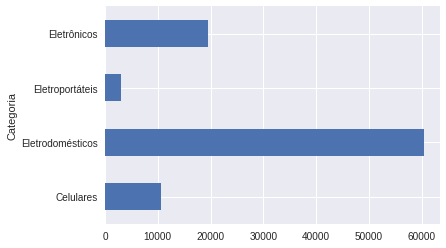

In [118]:
# Categorias mais vendidas
df_2013.groupby('Categoria')['ValorVenda'].sum().plot.barh();

In [121]:
df['ValorVenda'].describe()

count     457.000000
mean      790.111838
std       755.541075
min        12.000000
25%       167.000000
50%       671.000000
75%      1230.000000
max      3999.000000
Name: ValorVenda, dtype: float64

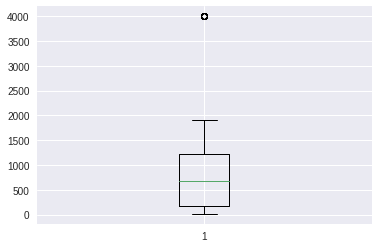

In [122]:
# Grafico de Boxplot
plt.boxplot(df['ValorVenda']);



(array([166., 106.,  34., 132.,   4.,   0.,   0.,   0.,   0.,  15.]),
 array([  12. ,  410.7,  809.4, 1208.1, 1606.8, 2005.5, 2404.2, 2802.9,
        3201.6, 3600.3, 3999. ]),
 <a list of 10 Patch objects>)

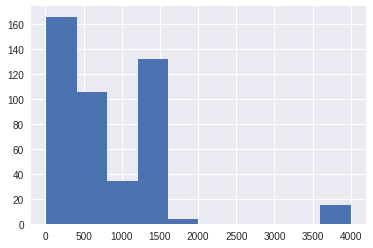

In [124]:
plt.hist(df['ValorVenda'])

In [128]:
# identificar o Outlier
df[df['ValorVenda'] > 3998]

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda,Comissao
147,SKU-0000148,Samsung Galaxy 8,Celulares,Corporativo,Samsung,A9990,Belo Horizonte,Minas Gerais,Maria Fernandes,1001,2013-07-21,3999.0,399.9
150,SKU-0000151,Samsung Galaxy 8,Celulares,Corporativo,Samsung,V7654,Vitória,Espírito Santo,Artur Moreira,1004,2013-10-24,3999.0,399.9
154,SKU-0000155,Samsung Galaxy 8,Celulares,Corporativo,Samsung,SP8822,São Paulo,São Paulo,Ana Teixeira,1009,2014-10-04,3999.0,399.9
156,SKU-0000157,Samsung Galaxy 8,Celulares,Corporativo,Samsung,SP8822,São Paulo,São Paulo,Mateus Gonçalves,1003,2014-02-02,3999.0,399.9
157,SKU-0000158,Samsung Galaxy 8,Celulares,Corporativo,Samsung,SP8822,São Paulo,São Paulo,Josias Silva,1006,2014-03-03,3999.0,399.9
158,SKU-0000159,Samsung Galaxy 8,Celulares,Corporativo,Samsung,SP8822,São Paulo,São Paulo,Artur Moreira,1004,2014-04-04,3999.0,399.9
159,SKU-0000160,Samsung Galaxy 8,Celulares,Corporativo,Samsung,SP8822,São Paulo,São Paulo,Artur Moreira,1004,2014-05-04,3999.0,399.9
169,SKU-0000170,Samsung Galaxy 8,Celulares,Corporativo,Samsung,SP8822,São Paulo,São Paulo,Maria Fernandes,1001,2015-02-02,3999.0,399.9
170,SKU-0000171,Samsung Galaxy 8,Celulares,Corporativo,Samsung,S6543,Osasco,São Paulo,André Pereira,1002,2015-03-02,3999.0,399.9
171,SKU-0000172,Samsung Galaxy 8,Celulares,Corporativo,Samsung,S6543,Osasco,São Paulo,André Pereira,1002,2015-04-02,3999.0,399.9


In [129]:
#Salvar em csv
df.to_csv("df_vendas_novo.csv", index=False)